In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy.stats import beta
#参数
theta1=0.4
theta2=0.6
theta3=0.8
N=10000


关于Simulation中问题1:理论最大期望为0.8*10000=8000,即一开始就知道3号摇臂出奖概率最大，只摇3号机。

In [2]:
#随机函数的设置
def r1():
    rand=random.random()
    # print(rand)
    if rand<theta1:
        return 1
    else:
        return 0


def r2():
    rand=random.random()
    # print(rand)
    if rand<theta2:
        return 1
    else:
        return 0


def r3():
    rand=random.random()
    # print(rand)
    if rand<theta3:
        return 1
    else:
        return 0


def R(t):
    if t==1:
        return r1()
    elif t==2:
        return r2()
    elif t==3:
        return r3()

In [3]:
#画图函数
def drawreward(total_reward):  #画收益和平均收益的图像
    x = np.linspace(0, 10000,10002)[1:-1]
    plt.plot(x,total_reward,label=r'total_reward=%.1f'%total_reward[9999])
    plt.title(u'reward')
    plt.ylim(0,10000)
    plt.xlim(0,10000)
    plt.legend()
    plt.show()
    plt.plot(x,total_reward/x,label='average reward')
    plt.title(u'average reward')
    plt.ylim(0.2,1)
    plt.xlim(0,200)
    plt.legend()
    plt.show()


def drawbeta(a,b):  #画beta分布的图像，备用
    x = np.linspace(0, 1, 1000)[1:-1]
    for j in range(1, 4):
        dist = beta(a[j], b[j])
        dist_y = dist.pdf(x)
        plt.plot(x, dist_y, label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a[j], b[j]))
    plt.title(u'Tompson')
    plt.xlim(0, 1)
    plt.ylim(0, 2.5)
    plt.legend()
    plt.show()


def drawprobability(probability):  #画每台机器的概率（Tompson）
    x = np.linspace(0, 10000, 10002)[1:-1]
    for j in range(1, 4):
        dist_y=probability[j][1:]
        plt.plot(x,dist_y,label='Arm'+str(j))
    plt.title(u'probability')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

In [4]:
def e_greedy(e):  #algorithm 1
    total_reward = [0 for t in range(N+1)]
    Theta_res = 0
    for k in range(100):  #迭代100次
        Theta = [0 for j in range(4)]
        I = [0 for t in range(N + 1)]
        count = [0 for j in range(4)]
        temp_reward=[0 for t in range(N+1)]
        for t in range(1, N+1):
            rand = random.random()
            # print(rand)
            if rand < 1-e:
                l=max(Theta[1],Theta[2],Theta[3])
                if l==Theta[1]:
                    I[t]=1
                elif l==Theta[2]:
                    I[t]=2
                elif l==Theta[3]:
                    I[t]=3
            else:
                I[t]=random.randint(1,3)
            count[I[t]]=count[I[t]]+1
            reward=R(I[t])
            temp_reward[t]=temp_reward[t-1]+reward
            Theta[I[t]]=Theta[I[t]]+((1/count[I[t]])*(reward-Theta[I[t]]))
        total_reward+=np.array(temp_reward)/100  #计算总收益
        Theta_res+=np.array(Theta)/100  #计算预测值
        # print(count)，备用，查看每台老虎机的操作次数
    total_reward=np.delete(total_reward,0)
    Theta_res=np.delete(Theta_res, 0)
    print("e参数取："+str(e)+"时，t=1~10000的收益：")
    print(total_reward)
    print("regret值为：")
    print(8000 - total_reward[9999])
    print("预测Theta值：")
    print(Theta_res)
    drawreward(total_reward)  #输出图像

In [5]:
def UCB(c=1):  # c 默认 1
    total_reward = [0 for t in range(N+1)]
    Theta_res = 0
    for k in range(100):  #迭代100次
        I = [0 for t in range(N+1)]
        I[1]=1
        I[2]=2
        I[3]=3
        Theta = [0 for j in range(4)]
        temp_reward = [0 for t in range(N + 1)]
        count = [1 for j in range(4)]
        for i in range(1,4):
            Theta[I[i]] = R(I[i])
            reward=R(I[i])
            temp_reward[i] = temp_reward[i - 1] + reward
        for t in range(4,N+1):
            A = [0 for j in range(4)]
            for j in range(1,4):
                A[j]=Theta[j]+(c*math.sqrt(2*math.log(t)/count[j]))
                l = max(A[1], A[2], A[3])
                if l == A[1]:
                    I[t]=1
                elif l == A[2]:
                    I[t]=2
                elif l == A[3]:
                    I[t]=3

            count[I[t]]=count[I[t]]+1
            reward = R(I[t])
            temp_reward[t] = temp_reward[t - 1] + reward  # 累计该次收益
            Theta[I[t]]=Theta[I[t]]+((1/count[I[t]])*(reward-Theta[I[t]]))
        # print(count)，备用
        total_reward += np.array(temp_reward) / 100  #计算总收益
        Theta_res += np.array(Theta) / 100  #计算预测值

    total_reward = np.delete(total_reward, 0)
    Theta_res = np.delete(Theta_res, 0)
    print("c参数取：" + str(c) + "时，t=1~10000的收益：")
    print(total_reward)
    print("regret值为：")
    print(8000 - total_reward[9999])
    print("预测Theta值")
    print(Theta_res)
    drawreward(total_reward) #画图像

In [6]:
def Tompson(a,b):
    savea=copy.copy(a)
    saveb=copy.copy(b)

    total_reward = [0 for t in range(N + 1)]
    Theta_res = 0
    probability = [[0 for t in range(N+1)] for j in range(4)]
    for k in range(100):
        Theta = [0 for j in range(4)]
        I = [0 for t in range(N + 1)]
        count = [0 for j in range(4)]
        temp_reward = [0 for t in range(N + 1)]

        for t in range(1,N+1):
            for j in range(1,4):
                # x = np.arange(0.01, 1, 0.01)
                # beta.pdf(x,a[j],b[j])
                Theta[j]=np.random.beta(a[j], b[j])  #采样
            l = max(Theta[1], Theta[2], Theta[3])
            if l == Theta[1]:
                I[t] = 1
            elif l == Theta[2]:
                I[t] = 2
            elif l == Theta[3]:
                I[t] = 3

            count[I[t]]=count[I[t]]+1
            reward=R(I[t])
            temp_reward[t] = temp_reward[t - 1] + reward
            a[I[t]]=a[I[t]]+reward
            b[I[t]]=b[I[t]]+1-reward
            for j in range(1,4):
                probability[j][t] += np.random.beta(a[j],b[j])/100
        total_reward += np.array(temp_reward) / 100  #计算收益
        Theta_res += np.array(Theta) / 100  #计算预测值
        # print(count)
        # if k<2
        #     drawbeta(a,b)  #检查beta分布
        a = copy.copy(savea)
        b = copy.copy(saveb)
    total_reward = np.delete(total_reward, 0)
    Theta_res = np.delete(Theta_res, 0)
    print("alpha,beta分别为")
    print(np.delete(a, 0),np.delete(b, 0))
    print("Tompson算法下，t=1~10000的收益：")
    print(total_reward)
    print("regret值为：")
    print(8000-total_reward[9999])
    print("预测Theta值")
    print(Theta_res)
    drawreward(total_reward)  #画收益图像
    drawprobability(probability)  #画概率图像

e参数取：0.1时，t=1~10000的收益：
[4.20000e-01 9.10000e-01 1.31000e+00 ... 7.78267e+03 7.78343e+03
 7.78427e+03]
regret值为：
215.72999999999865
预测Theta值：
[0.40166641 0.59905741 0.79976371]


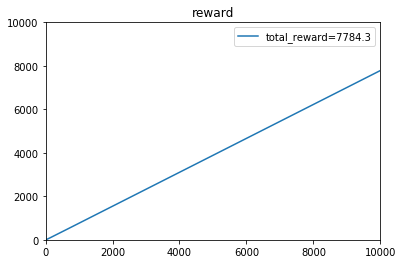

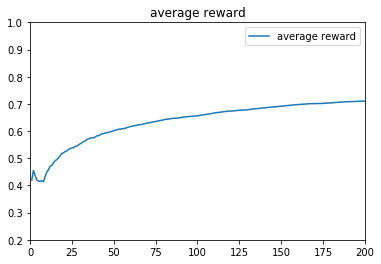

In [7]:
e_greedy(0.1)

e参数取：0.5时，t=1~10000的收益：
[4.50000e-01 9.80000e-01 1.49000e+00 ... 6.99136e+03 6.99205e+03
 6.99269e+03]
regret值为：
1007.3099999999995
预测Theta值：
[0.39821173 0.59814583 0.80040327]


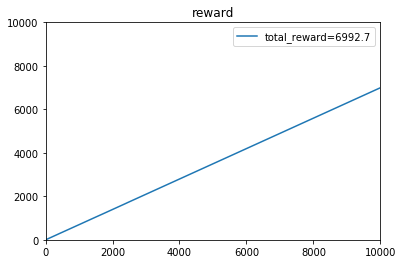

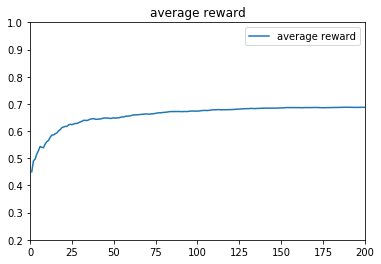

In [8]:
e_greedy(0.5)

e参数取：0.9时，t=1~10000的收益：
[5.40000e-01 1.14000e+00 1.74000e+00 ... 6.20862e+03 6.20931e+03
 6.20996e+03]
regret值为：
1790.0400000000027
预测Theta值：
[0.40182244 0.60207399 0.80021209]


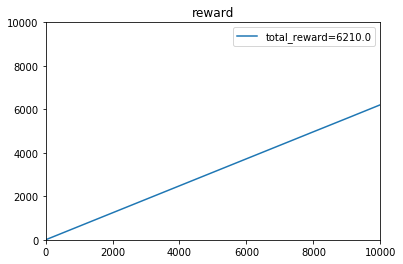

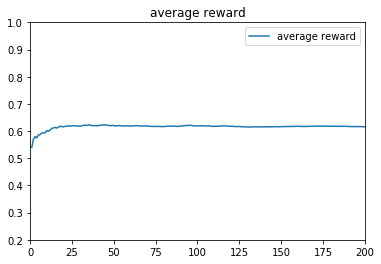

In [9]:
e_greedy(0.9)

c参数取：1时，t=1~10000的收益：
[3.80000e-01 8.60000e-01 1.61000e+00 ... 7.89263e+03 7.89333e+03
 7.89411e+03]
regret值为：
105.89000000000215
预测Theta值
[0.38664761 0.59712598 0.79940634]


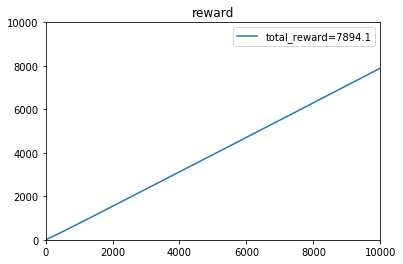

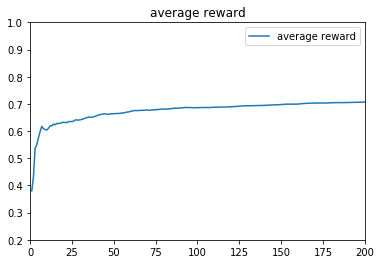

In [10]:
UCB(1)

c参数取：5时，t=1~10000的收益：
[3.70000e-01 1.07000e+00 1.85000e+00 ... 7.13207e+03 7.13278e+03
 7.13357e+03]
regret值为：
866.4299999999994
预测Theta值
[0.39966456 0.59921349 0.79886625]


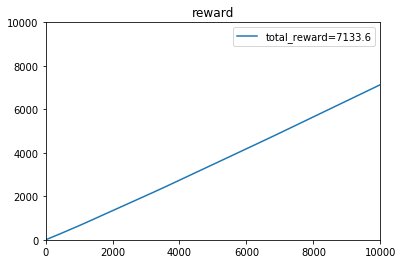

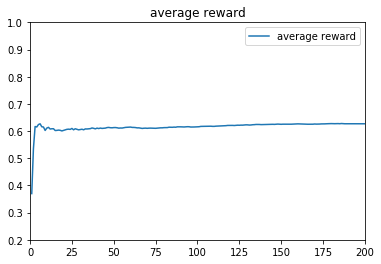

In [11]:
UCB(5)  

c参数取：10时，t=1~10000的收益：
[3.80000e-01 8.30000e-01 1.65000e+00 ... 6.67535e+03 6.67607e+03
 6.67683e+03]
regret值为：
1323.170000000001
预测Theta值
[0.39852165 0.60163882 0.80046364]


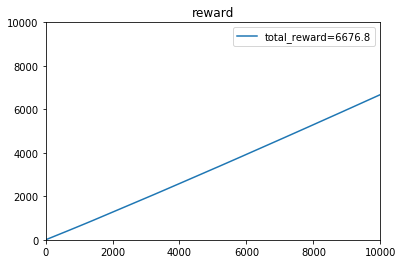

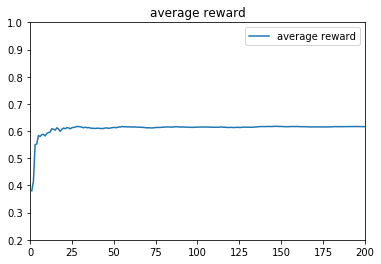

In [12]:
UCB(10)  

alpha,beta分别为
[1 1 1] [1 1 1]
Tompson算法下，t=1~10000的收益：
[5.60000e-01 1.14000e+00 1.77000e+00 ... 7.98061e+03 7.98136e+03
 7.98212e+03]
regret值为：
17.880000000001928
预测Theta值
[0.37343004 0.53172827 0.79931412]


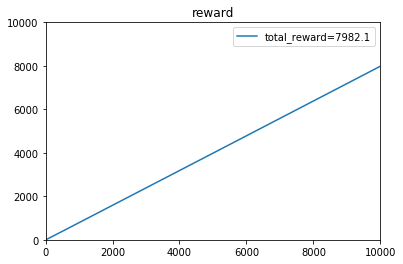

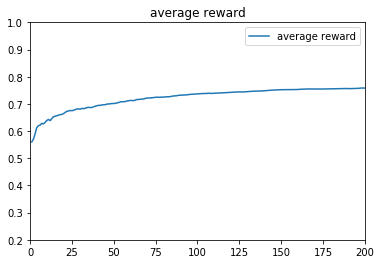

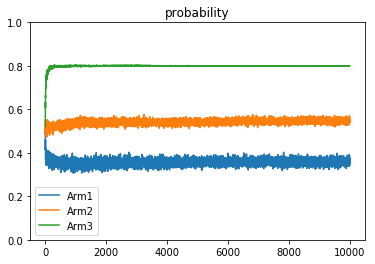

In [13]:
a = [0, 1, 1, 1]
b = [0, 1, 1, 1]
Tompson(a,b)

alpha,beta分别为
[2 3 1] [4 6 2]
Tompson算法下，t=1~10000的收益：
[6.00000e-01 1.24000e+00 1.93000e+00 ... 7.99911e+03 7.99991e+03
 8.00080e+03]
regret值为：
-0.7999999999992724
预测Theta值
[0.37417063 0.45870278 0.80089121]


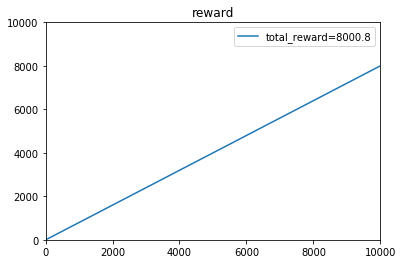

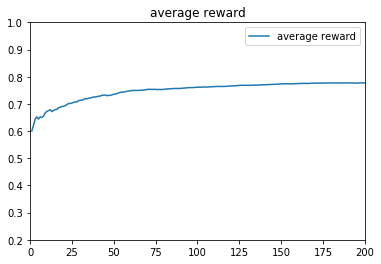

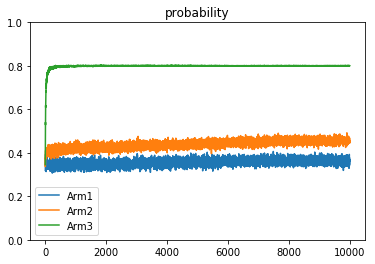

In [14]:
a = [0, 2, 3, 1]
b = [0, 4, 6, 2]
Tompson(a,b)

Simulation中2 3 4 5的解答已经整合在上述输出结果中

Simulation 6:

regret值已经在前面的输出中计算过了
从结果来看，在三种算法中，Tompson Sampling算法是最好的算法，regret最少，并且最快确定最优选项。

ε-greedy算法中的ε，主要是用于控制摇臂（arm）的选择策略，ε越小，算法越倾向于利用之前的结果，预测出高概率吐钱的摇臂并选择，是一种守成（或者说是贪心）的策略，ε越大，算法随机性越大，越倾向于去随机选择一个摇臂，是一种探索的策略。从上面的3种不同的参数设计就能看出来，参数对结果的影响很大。

UCB算法中的C，主要是作为系数，影响和置信度相关的一个单项式，置信度对于很少被选择的摇臂来说，随着timeslot增长会不断增大，提高其被选中的概率，而另一方面C越大，置信度提升也越大，被选择次数少的摇臂就更容易被选中，探索性也就越大。

TS算法里的alpha和beta，是作为贝塔分布的参数而设置的，每个机器设置一个alpha参数和一个beta参数，alpha代表有收益次数，beta代表无收益次数，当a/(a+b)的值越大，分布集中区域就越靠近1，反之靠近0，越靠近1则代表吐奖概率越大；当a+b的值越大，分布就越集中，因为该分布区域样本很多，说明该摇臂被大量操作。每次摇臂操作后，对被操作摇臂的alpha值和beta值进行更新，并且他的后验概率也是服从贝塔分布的。

相比前两种算法，TS算法不是利用之前的选择结果进行预测，而是从分布中进行取样。
最优选项会拥有比较大的（平均）随机采样值，相比其他选项，大部分情况下他的采样值都是最高的，满足守成性的要求，可以保证更大的平均收益。但考虑到其他选项采样时可能会产生更大的随机值，这种随机性可以满足模型的探索性要求，从而确定每种选项的分布集中区域，建立更精准的模型，避免盲目选择同一项，误判最优选项。

Simulation 7:

多臂老虎机问题是探索与守成的权衡问题，探索意味着需要通过选择不同摇臂确定每个摇臂的吐奖模型，而守成意味着选择吐奖概率最高的摇臂进行操作。
如果我们不进行探索，只对着一部分老虎机集中操作，就不知道哪个摇臂的吐奖概率最高，从而可能错过最优选项。
如果我们不遵从守成，就会浪费大量拉杆次数在低回报率的摇臂上，从而降低我们的平均收益。
为此，我们需要兼顾这两方面。

在以预测为主的算法中，我们需要通过控制参数来决定下一次操作是进行守成还是探索。
在TS算法中，我们是通过分布自身的随机性来决定是否进行探索，参数仅提供初采样时的分布模型。
在面对相似类型的任务时，需要我们通过探索，快速确定最优选择，再反复操作最优选项，进而获取最大收益。
任务前期探索策略较多，收益也不稳定，主要关注点应在最优选项上，随着模型越来越准确，守成的策略会更多，平均收益会越来越高，此时的关注点才是收益。

Simulation 8:

本题的老虎机吐奖概率遵从固定的概率分布，并且独立。查阅资料后了解了其他的情况，如adversarial bandit和Markovian bandit。
假设本题的情况变成了adversarial bandit。连续选择吐奖概率最高的摇臂后，该摇臂的reward下降，另一条摇臂reward上升。
此时就不能沿用概率固定且独立的情况了。原先的策略是优先寻找最优选项，然后用守成的办法提高平均收益，现在也不能照搬。

我的想法是，制定一个loss值，用来衡量当前选择成为最佳选项后，实际收益与收益期望的差值，loss越大，算法越趋于选择其他选项，因为此时有可能我的选择已经被机器制裁了，获奖率开始下降了，在这个时候我就会提高其他选项的优先级，重新开始寻找更优选择，loss清空。实际上，我想让loss成为在某一区间衡量regret的量度，成为与reward相对的一个反馈值，从而对整个模型进行适时的调整。

我了解到比较成熟的算法有EXP3，其主要思想也是控制regret

 
心得与体会：

通过学习该问题，我觉得我对强化学习的问题形式有了最基本的认识（即不提供数据，通过reward反馈来指导模型建立和优化），也体会到了数学，特别是概率论在这方面的重要性。我仍然认为自己的代码有可以优化的地方，但是对于算法本身我已经有比较清楚的理解。我觉得题目中所体现的权衡问题是非常值得深入研究的，并且选用的算法展现出了强化学习的优越性，我觉得强化学习在科研和实际应用中都很有前景，也非常有兴趣在强化学习领域进行进一步的学习。虽然我现在的基础比较薄弱，但我会想办法快速提升自己的水平，我觉得多研究这一类经典问题，可以快速提升自己的数理基础、编程水平和对于强化学习这个方向的认识，一定会有不菲的收获。希望能得到老师的认可和进一步指导。

（以上内容仅有部分理论基础方面的参考，代码和问题回答全部为独立原创。）

陈铭